# Wave Optics

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep,time
from ipycanvas import MultiCanvas, hold_canvas,Canvas
import matplotlib as mpl
import matplotlib.cm as cm


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

Wave optics extends our insight into optics with the help of a wave description. Light is able to interfere or to be diffracted at edges and it reveals specific colors in the visible range, where are not able to take account of that with the help of geometrical optics. The spectrum of electromagnetic waves extends over a huge range of frequencies and only a tiny fraction of it is related to the visible region.

|<img src="img/spectrum.png" width="50%"> |
|-|
| **Fig.:** .|

In the following, we would like to introduce wave by discarding the fact, that light is related to electric and magnetic fields. This is useful as the vectorial nature of the electric and magnetic field further complicates the calculations, but we do not need those yet. Accordingly we also do not understand how light really interacts with matter and we therefore have to introduce some postulates as well.

## Postulates of Wave Optics

### Wave equation

$$
\nabla^2 u - \frac{1}{c^2}\frac{\partial^2 u}{\partial t^2}=0
$$

where 

$$
\nabla^2 )\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}+\frac{\partial^2}{\partial z^2}
$$

is the Laplace operator. The wave equation is a linear differential equation, which means that the superposition principle is valid. This means, that if we have found two solution $u_1(\vec{r},t)$ and $u_2(\vec{r},t)$ being solutions of the wave equation, then $u(\vec{r},t)=a_1 u_1(\vec{r},t)+a_2*u_2(\vec{r},t)$ is a solution as well ($a_1,a_2$ being constants)

### Intensity of waves

$$
I(\vec{r},t)=2\langle u^2(\vec{r},t)\rangle
$$

which is given in units $[\frac{W}{m^2}]$. The $\langle \ldots \rangle$ denotes a time average over one cycle of the oscillation of $u$. This is extremely short. For light of 600 nm wavelength, one cycle just lasts 2 femtoseconds.

Optical power

$$
P=\int_A I(\vec{r},t) dA
$$

### Monochromatic wave

$$u(\vec{r},t)=a(\vec{r})\cos(\omega t + \phi(\vec{r}))$$

with 

- $a(\vec{r})$ as the amplitude 
- $\phi(\vec{r})$ as the spatial phase
- $\omega$ as the frequency

|<img src="img/wave.png" width="50%"> |
|-|
| **Fig.:** .|

We may also introduce a complex representation of a wave by

$$
U(\vec{r},t)=a(\vec{r})e^{i\phi(r)}e^{i\omega t}
$$

which is called the complex wavefunction. This complex wavefunction is related to the real weavefunction by

$$
u(\vec{r},t)=Re\lbrace U(\vec{r},t)\rbrace=\frac{1}{2}\left [ U(\vec{r},t)+U^*(\vec{r},t)\right ]
$$

but allows us much easier calculations. In the same way as for real wavefunction we may now also write a wave equation for the complex wavefunction


$$
\nabla^2 U - \frac{1}{c^2}\frac{\partial^2 U}{\partial t^2}=0
$$

We may now further split up the complex wavefunction into a spatial and temporal dependence

$$
U(\vec{r},t)=U(\vec{r})e^{i\omega t}
$$

where

$$
U(\vec{r},t)=a(\vec{r})e^{i\phi(\vec{r})}
$$

The quantity $\phi$ resembles to be the spatial part of the phase of a wavefunction. The intensity of the wave if further now just given by

$$
I(\vec{r})=|U(r)|^2
$$

|<img src="img/complex_rep.png" width="50%"> |
|-|
| **Fig.:** .|

## Plane Waves

A plane wave is a solution of the homogeneous wave equation and is given in its complex form by 

\begin{equation}
U=Ae^{-i\vec{k}\cdot \vec{r}}e^{i\omega t}
\end{equation}

where the two exponentials contain an spatial and a temporal phase. $A$ denotes the amplitude of the plane wave. The plane is defined by the shape of the wavefront which is given by $\vec{k}\cdot \vec{r}=const$, which is just the definition of a plane perpendicular to $\vec{k}$.

A wave is a physical quantity which oscillates in space and time. Its energy current density is related to the square magnitude of the amplitude. We will include in the following the spatial and the temporal phase. For plotting just the spatial variation of the wave, you may just use the spatial part of the equation

\begin{equation}
U(\vec{r})=Ae^{-i\vec{k}\cdot \vec{r}}
\end{equation}

But since we also want to see the wave propagate, we will directly include also the temporal dependence on our function. In all of the computational examples below we set the amplitude of the wave $A=1$. 

The propagation of the wave is defined by wavevector $\vec{k}$. In vacuum, the wavevector is just real valued

\begin{equation}
\vec{k}_{0}=
\begin{pmatrix}
k_{0x} \\
k_{0y}\\
k_{0z}\\
\end{pmatrix}
\end{equation}


The wavevector is providing the direction in which the wavefronts propagate. It is also proportional to the momentum of the wave, which will be important if we consider the refraction process a bit later. The magnitude of the wavevector is related to the wavelength $\lambda$ and called the wavenumber. 

\begin{equation}
k_{0}=\frac{2\pi}{\lambda_{0}}=\frac{\omega}{c_{0}}
\end{equation}

At the same time, its magnitude is also given by the frequency of the light devided by the wave vector. The latter is called a dispersion relation. 

In a medium, the wavevector is by a factor of $n$ longer, where n is the refractive index. Since the refractive index may be a complex number, e.g. $n=\eta+i\kappa$, the wavevector can be imaginary as well. It is then given by 


\begin{equation}
\vec{k}=n\vec{k}_{0}=
\begin{pmatrix}
k_{x}^{\prime}+ik_{x}^{"} \\
k_{y}^{\prime}+ik_{y}^{"} \\
k_{z}^{\prime}+ik_{z}^{"} \\
\end{pmatrix}
\end{equation}

The complex number of the refractive index means, that there is some damping of the wave due to absorption, for example. 



In [47]:
def plane_wave(k,omega,r,t):    
    return(np.exp(1j*(np.dot(k,r)-omega*t)))

Lets have a look at waves and wave propagation. We want to create a wave, which has a wavelength of 532 nm in vacuum.

In [48]:
wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c

It shall propagate along the z-direction and we wull have a look at the x-z plane.

In [49]:
vec=np.array([0.,0.,1.])
vec=vec/np.sqrt(np.dot(vec,vec))

k=k0*vec

We can plot the electric field in the x-z plane by defining a grid of points (x,z). This is done by the *meshgrid* function of *numpy*. The meshgrid returns a 2-dimensional array for each coordinate. Have a look at the values in the meshgrid.

In [50]:
x=np.linspace(-2.5e-6,2.5e-6,300)
z=np.linspace(0,5e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z],dtype=object)

In the last lines, we defined an array of X,0,Z, where X and Z are already 2-dimensional array. This finally gives an array 3D vectors, which we can use to calculate the electric field at any point in space. If we want to plot the electric field, we have to calculate the real part of the complex values, as the electric field is a physical quantity, which is always real. There is not much to see for a plane wave in the intensity plot, as the intensity of a plane wave is constant in space. Yet, if you want to plot it, you have to calculate the magnitude square of the electric field, e.g.

\begin{equation}
I\propto |E|^{2}
\end{equation}

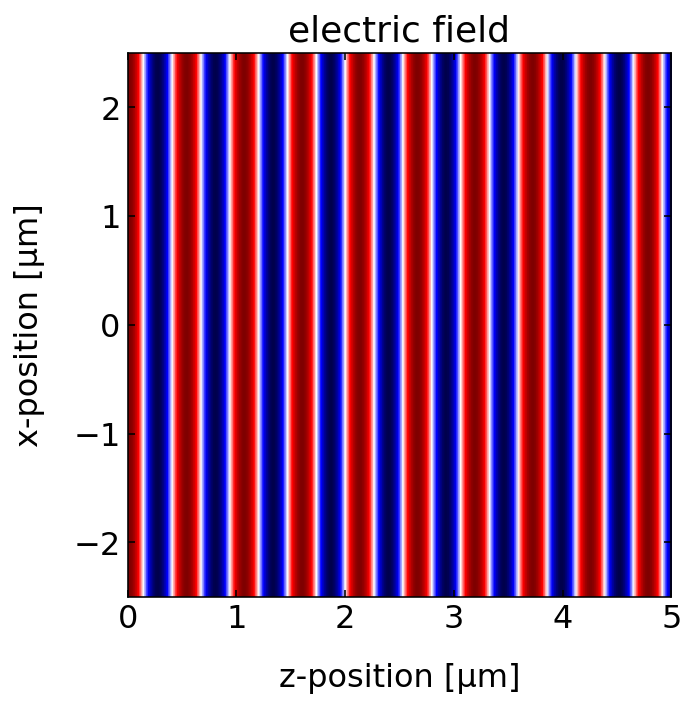

In [51]:
plt.figure(figsize=(12,5))
field=plane_wave(k,omega0,r,0)
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6

plt.title('electric field')
plt.imshow(np.real(field.transpose()),extent=extent,vmin=-1,vmax=1,cmap='seismic')
plt.xlabel('z-position [µm]')
plt.ylabel('x-position [µm]')


plt.show()

### Plane wave propagation

The above graph shows a static snapshot of the plane wave at a time $t=0$. We know, however, that a plane wave is propagating in space and time. 
Since we know how to animate things, we may do that using the `ipycanvas` module.

In [52]:
x=np.linspace(-2.5e-6,2.5e-6,300)
z=np.linspace(0,5e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z],dtype=object)

In [53]:
canvas = Canvas(width=300, height=300,sync_image_data=True)
display(canvas)

Canvas(height=300, sync_image_data=True, width=300)

To do the animation I use a little trick to get the same color map as in the matplotlib plotting. The function below uses the matplotlib color map `seismic` and the corresponding mapping of values with a given minimum `vmin` and maximum `vmax` value. The mapping is done in the animation function with `c=m.to_rgba(tmp)`.

In [54]:
#normalize the color map to a certain value range
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

#call the color map
cmap = cm.seismic

# do the mapping of values to color values.
m = cm.ScalarMappable(norm=norm, cmap=cmap)

This is our animation function, where I provide time and the wavevector as arguments, such that we may change both parameters easily.

In [55]:
def animate(k,time):
    for t in time:
        field=plane_wave(k,omega0,r,t)        
        tmp=np.real(field.transpose())
        c=m.to_rgba(tmp)
        with hold_canvas(canvas):
            canvas.put_image_data(c[:,:,:3]*255,0,0)
            #canvas.put_image_data(data*255,0,0)
        sleep(0.02)

With the call below, you may animate the wave now with different refractive indices.

In [56]:
eta=1
kappa=0
n=eta+kappa*1j

k=n*k0*vec
time= np.linspace(0,5e-14,500)
animate(k,time)

## Spherical Waves

A spherical wave is as well described by two exponentials containing the spatial and temporal dependence of the wave. The only difference is, that the wavefronts shall describe spheres instead of planes. We therefore need $|\vec{k}||\vec{r}|=k r=const$. The product of the magntitudes of the wavevector and the distance from the source are constant. If we further generalize the position of the source to $\vec{r}_{0}$ we can write a spherical wave by 

\begin{equation}
U=\frac{A}{|\vec{r}-\vec{r}_{0}|}e^{-i k|\vec{r}-\vec{r}_{0}|} e^{i\omega t}
\end{equation}

Note that we have to introduce an additional scaling of the amplitude with the inverse distance of the source. This is due to energy conservation, as we require that all the energy that flows through all spheres around the source is constant.

In [57]:
def spherical_wave(k,omega,r,r0,t):
    k=np.linalg.norm(k)*np.sign(k[2])
    d=np.linalg.norm(r-r0)
    return( np.exp(1j*(k*d-omega*t))/d)

Lets have a look at the electric field of the spherical wave. Below is some code plotting the electric field is space. The source is at the origin and the plot nicely shows, that the amplitude decays with the distance.

<ipython-input-58-2df42afded16>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  r=np.array([X,0,Z])


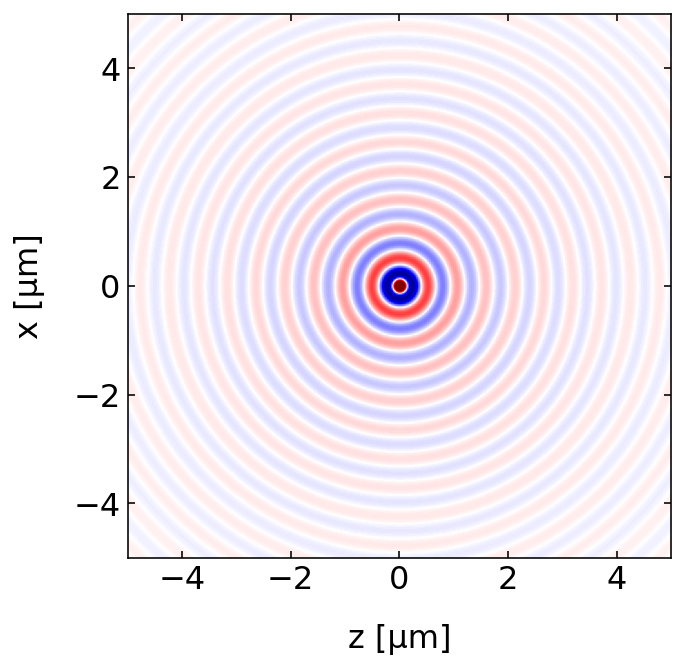

In [58]:
plt.figure(figsize=(5,5))

x=np.linspace(-5e-6,5e-6,300)
z=np.linspace(-5e-6,5e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c

k=k0*np.array([0,0,1.])
r0=np.array([0,0,0])

field=spherical_wave(k,omega0,r,r0,0)

extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.real(field.transpose()),extent=extent,vmin=-5e6,vmax=5e6,cmap='seismic')

plt.xlabel('z [µm]')
plt.ylabel('x [µm]')
plt.show()

The line plots below show that the field amplitude rapidly decays and the intensity follows a $1/r^2$ law as expected. The slight deiviation at small distances is an artifact from our discretization. We used the image above to extract the line plot and therefore never exactly hit $r=0$. 

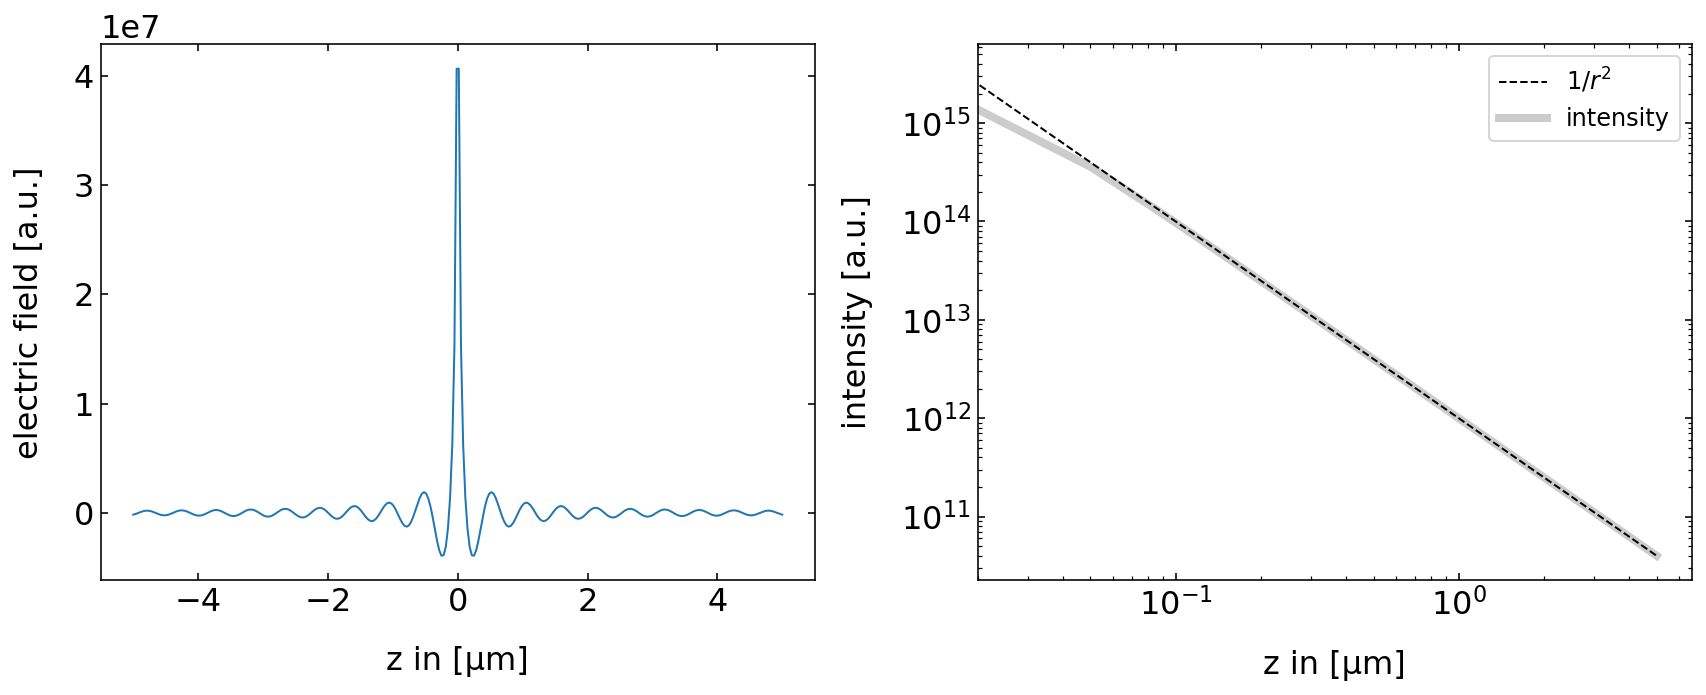

In [59]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(z*1e6,np.real(field.transpose()[150,:]))
plt.xlabel('z in [µm]')
plt.ylabel('electric field [a.u.]')


plt.subplot(1,2,2)
plt.loglog(z*1e6,1/(z**2),'k--',label='$1/r^2$')
plt.loglog(z*1e6,np.abs(field.transpose()[150,:])**2,color='k',alpha=0.2,lw=4,label='intensity')
plt.xlabel('z in [µm]')
plt.xlim(2e-2,)
plt.ylabel('intensity [a.u.]')
plt.legend()
plt.tight_layout()
plt.show()

### Spherical wave propagation

We can also visualize the animation our spherical wave to check for the direction of the wave propagation.

In [60]:
norm = mpl.colors.Normalize(vmin=-5e6, vmax=5e6)
cmap = cm.seismic
m = cm.ScalarMappable(norm=norm, cmap=cmap)

In [61]:
canvas = Canvas(width=300, height=300,sync_image_data=True)
display(canvas)

Canvas(height=300, sync_image_data=True, width=300)

In [62]:
def animate(k,time):
    for t in time:
        field=spherical_wave(k,omega0,r,r0,t)
        data=np.zeros([300,300,3])
        tmp=np.real(field.transpose())
        c=m.to_rgba(tmp)
        with hold_canvas(canvas):
            canvas.put_image_data(c[:,:,:3]*255,0,0)
        sleep(0.02)

In [63]:
time= np.linspace(0,2e-14,400)
animate(k,time)

## Interference

## Huygens Principle

The Huygens principle states, that each point of a wavefront is the source of a spherical wave in forward direction. This means nothing else, that any wave can be expanded into a superposition of spherical waves, which is the fundamental of Mie scattering for example. Yet, the overall statement of this principle seems a bit unphysical. Classically, accelerated charges are the source of electromagnetic waves. If there is no accelerated charge, there is no wave. Yet, the Huygens principle is in accord with quantum field theory.  

## Diffraction pattern of a single slit

Here we would like to have a look at the Huygens principle by playing around with the interference from multiple sources arranged on a line. Using this way we can simulate the diffraction patterns from a slit. So here is our spherical wave function again.

In [64]:
def spherical_wave(k,omega,r,r0,t):
    k=np.linalg.norm(k)
    d=np.linalg.norm(r-r0)
    return( np.exp(1j*(k*d-omega*t))/d)

The next cell defines the space for our calculation again. The value of $d$ denotes the slit width, which we want to vary to see the effect of changing slit width vs. wavelength, which we chose to be $\lambda=532$ nm.

In [65]:
x=np.linspace(-5e-6,5e-6,300)
z=np.linspace(0,10e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z],dtype=object)

wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c
k=k0*np.array([0,0,1.])

The next cell sums up the electric field of 200 spherical waves in the x-z plane such that we can plot the intensity or the field in space. 

In [66]:
def slit(d1,d2,r):
    field=0
    for x0 in np.linspace(d1,d2,400):    
        r0=np.array([x0,0,-0.1e-6])
        field=field+spherical_wave(k,omega0,r,r0,0)

    field=field/np.max(field)
    return(field)


Let us plot the wavefronts and the intensity pattern in space. As the intensity decays strongly with distance from the slit, we do that by taking the log of the intensity.

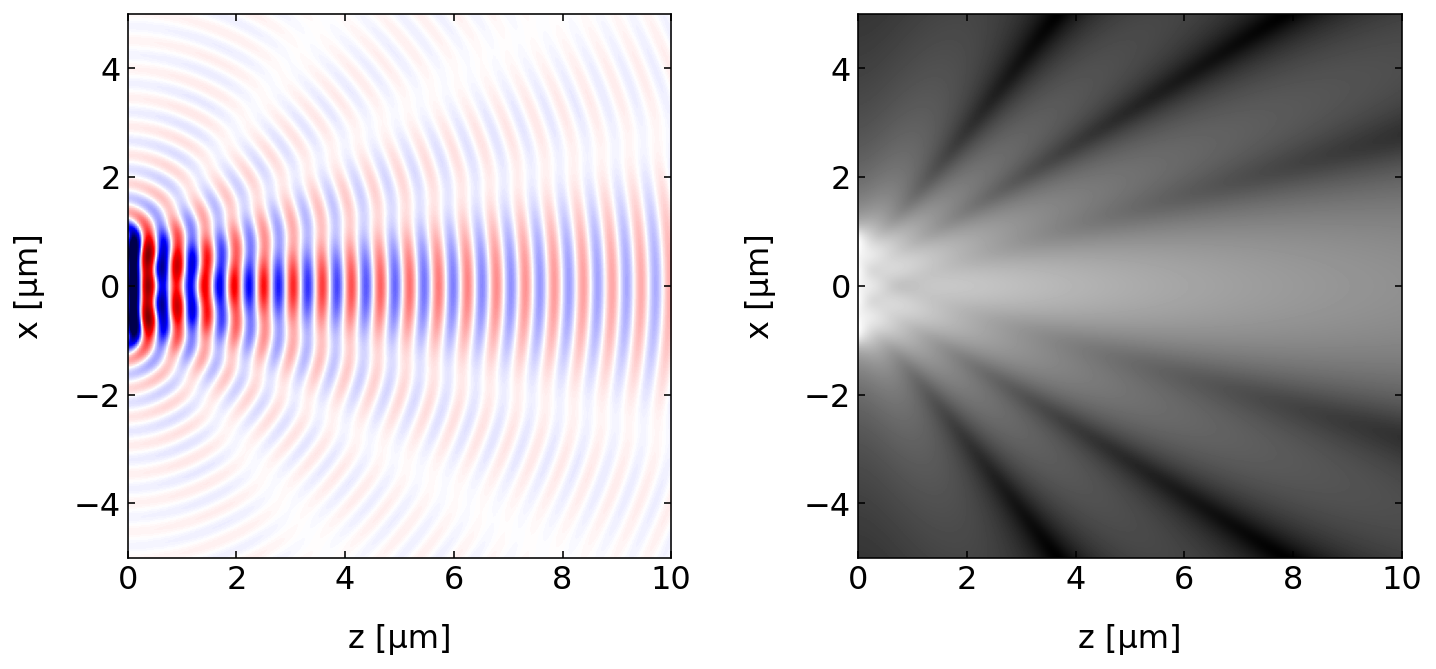

In [67]:
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
field=slit(-1e-6,1e-6,r)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(np.real(field.transpose()),extent=extent,vmin=-1,vmax=1,cmap='seismic')
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')


plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(field.transpose())**2),extent=extent,cmap='gray')
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')

plt.show()

### Farfield vs. nearfield

You might remember that there is a difference between the nearfield and the farfield intensity pattern begind a slit or in general. The farfield approximation is the usual approximation which we deal with in the undergraduate lectures. It measures the intensity at large distance. The Fresnel approximation is looking at the near fields, where the wavefronts are curved and this is of relevance for the diffraction pattern. Let us look at two distances, $d=1$ µm and $d=100$ µm to show the difference between both intensity patterns.

In [68]:
x1=np.linspace(-10e-6,10e-6,1000)
z=np.array([1e-6])
X,Z=np.meshgrid(x1,z)
r=np.array([X,0,Z])
d=5e-6

## near field calculation
field=slit(d,r)

x2=np.linspace(-50e-6,50e-6,1000)
z=np.array([100e-6])
X,Z=np.meshgrid(x2,z)
r=np.array([X,0,Z])

## far field calculation
field1=slit(d,r)

<ipython-input-68-1263304c3c5c>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  r=np.array([X,0,Z])


TypeError: slit() missing 1 required positional argument: 'r'

The two plots below show the drastic difference between the diffraction pattern in the near field and the far field. The near field resembles to be a shadow picture, while the far field intensity pattern is considerable wider than the slit. This even becomes worse, if we make the slit narrower. 

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x1*1e6,np.abs(field[0,:])**2)
plt.axvline(x=-d/2*1e6,ls='--')
plt.axvline(x=d/2*1e6,ls='--')
plt.title("near field")
plt.xlabel('x [µm]')
plt.ylabel('intensity [a.u.]')


plt.subplot(1,2,2)
plt.plot(x2*1e6,np.abs(field1[0,:])**2)

plt.axvline(x=-d/2*1e6,ls='--')
plt.axvline(x=d/2*1e6,ls='--')
plt.title("far field")
plt.xlabel('x [µm]')
plt.ylabel('intensity [a.u.]')
plt.tight_layout()

plt.show()

### Comparison to the analytical solution

We know now the numerical solution summing up many spherical waves. If we calculate the analytical pattern, we actually do the same thing. We sum up many spherical waves for large distances. The analytical result we obtain for a single slit is


\begin{equation}
I=I_{0}\left (\frac{\sin(\delta)}{\delta}\right )^2
\end{equation}

where 
\begin{equation}
\delta=\frac{\pi d}{\lambda}\sin(\theta)
\end{equation}

and $d$ is the slit width. $\theta$ is the diffraction angle. So lets compare our numerical calculation with the analytical prediction. 

In [ ]:
def single_slit(d,z,x):
    theta=np.arctan2(x,z)
    delta=np.pi*d/wavelength*np.sin(theta)
    return((np.sin(delta)/delta)**2)

In [ ]:
intensity=single_slit(d,100e-6,x2)

The plot below nicely shows that we are not to bad with our numerical simulation and the 200 sources. You may want to further explore how the number of sources used changes the result. How many sources would be enough? 

In [ ]:
plt.plot(x2*1e6,np.abs(field1[0,:])**2,'k-.',lw=4,alpha=0.3)
plt.plot(x2*1e6,intensity,'k')
plt.xlabel('x [µm]')
plt.ylabel('intensity [a.u.]')
plt.show()

You may also want to explore what the wavelength and the slit width change on the diffraction pattern. The next step would be to show the diffraction pattern from a grating or even to show the diffraction from a spherical particles, where the sources are spread over spherical region is space. I would leave this effort to you and your project.

Create the intensity pattern generated by a grating with 10 slits of width $d$ and distance $D$. Compare that to the analytical solution.

\begin{equation}
I=I_{0}\left (\frac{\sin(\delta)}{\delta}\right )^2\left (\frac{\sin(N\gamma)}{\sin(\gamma)}\right )^2
\end{equation}


where 
\begin{equation}
\gamma=\frac{\pi D}{\lambda}\sin(\theta)
\end{equation}

and $N$ is the number of slits.